<a href="https://colab.research.google.com/github/liah12345/Credit-Risk-Prediction-using-Deep-Learning/blob/main/Taiwan_Credit_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, roc_auc_score, accuracy_score
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.gridspec as gridspec
from collections import Counter
import plotly.offline as py
py.init_notebook_mode(connected=True)


The Taiwan Credit Card dataset contains credit card transactions completed by Taiwanese cardholders between the months of April 2005 and September 2005 (Ala'raj et al., 2021). The dataset was made available by I-Cheng Yeh of the Department of Information Management at Chung Hua University.
The Taiwan CC dataset has 30,000 credit card transactions made by Taiwan customers, described by 24 features. These features include the credit limit of the customer, gender/Sex, education level, marital status, age, payment status of the customer for the past six months from April to September, bill amounts for the past six months from April 2005 to September 2005, payment amounts for the past six months from April 2005 to September 2005 in New Taiwan Dollars, and a target default payment attribute that describes whether the credit card transaction made by the customer resulted in a default payment.  


Taiwan Credit Card Dataset
In this research, consumers in Taiwan made up the population. There hasn't been a thorough study done to determine deep learning models can better detect the risk of credit card candidates when compared to machine learning models. The aim of this correlational numerical research is to build a credit-qualifying LSTM ensemble model to assist main financial institutions in their risk management tasks (Said et al., 2023).


In [2]:
# Import required libraries
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt


In [3]:
# MODELING
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.ensemble import StackingClassifier

In [49]:
# Load the dataset. I dropped all the missing values because they were few
df = pd.read_csv('/content/drive/MyDrive/UCI_Credit_Card.csv', skipinitialspace = True)
df = df.dropna()
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
df.head(n = 7).style.set_properties(**{"background-color": "#20B2AA", "font-size" : "15px",
                                        "color": "#ffffff", "border": "1.5px solid black"})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.000000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.000000,2,2,2,26,-1,2,0,0,0,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,4,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,5,50000.000000,1,2,1,57,-1,0,-1,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
5,6,50000.000000,1,1,2,37,0,0,0,0,0,0,64400.000000,57069.000000,57608.000000,19394.000000,19619.000000,20024.000000,2500.000000,1815.000000,657.000000,1000.000000,1000.000000,800.000000,0
6,7,500000.000000,1,1,2,29,0,0,0,0,0,0,367965.000000,412023.000000,445007.000000,542653.000000,483003.000000,473944.000000,55000.000000,40000.000000,38000.000000,20239.000000,13750.000000,13770.000000,0


In [50]:
df.rename(columns = {"LIMIT_BAL" : "Limit_bal", "SEX" : "Sex", "EDUCATION" : "Education", "MARRIAGE" : "Marriage","AGE":"Age",
                     "PAY_0":"Pay_1", "PAY_2":"Pay_2", "PAY_3":"Pay_3", "PAY_4":"Pay_4","PAY_5":"Pay_5", "PAY_6":"Pay_6","BILL_AMT1":"Bill_amt_1",
                     "BILL_AMT2":"Bill_amt_2","BILL_AMT3":"Bill_amt_3", "BILL_AMT4":"Bill_amt_4", "BILL_AMT5":"Bill_amt_5",
                     "BILL_AMT6":"Bill_amt_6", "PAY_AMT1":"Pay_amt_1", "PAY_AMT2":"Pay_amt_2", "PAY_AMT3":"Pay_amt_3", "PAY_AMT4":"Pay_amt_4",
                     "PAY_AMT5":"Pay_amt_5", "PAY_AMT6":"Pay_amt_6", "default.payment.next.month":"Default"
                     },
          inplace = True)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          30000 non-null  int64  
 1   Limit_bal   30000 non-null  float64
 2   Sex         30000 non-null  int64  
 3   Education   30000 non-null  int64  
 4   Marriage    30000 non-null  int64  
 5   Age         30000 non-null  int64  
 6   Pay_1       30000 non-null  int64  
 7   Pay_2       30000 non-null  int64  
 8   Pay_3       30000 non-null  int64  
 9   Pay_4       30000 non-null  int64  
 10  Pay_5       30000 non-null  int64  
 11  Pay_6       30000 non-null  int64  
 12  Bill_amt_1  30000 non-null  float64
 13  Bill_amt_2  30000 non-null  float64
 14  Bill_amt_3  30000 non-null  float64
 15  Bill_amt_4  30000 non-null  float64
 16  Bill_amt_5  30000 non-null  float64
 17  Bill_amt_6  30000 non-null  float64
 18  Pay_amt_1   30000 non-null  float64
 19  Pay_amt_2   30000 non-nul

In [8]:
df.shape

(30000, 25)

In [9]:
print("There are total {} null values in the dataset".format(df.isnull().sum().sum()))

There are total 0 null values in the dataset


In [10]:
df['Default'].value_counts(normalize = True)

0    0.7788
1    0.2212
Name: Default, dtype: float64

In [11]:
df.describe().style.set_properties(**{"background-color": "#20B2AA", "font-size" : "15px",
                                        "color": "#ffffff", "border": "1.5px solid black"})

,ID,Limit_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt_1,Bill_amt_2,Bill_amt_3,Bill_amt_4,Bill_amt_5,Bill_amt_6,Pay_amt_1,Pay_amt_2,Pay_amt_3,Pay_amt_4,Pay_amt_5,Pay_amt_6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,47013.154800,43262.948967,40311.400967,38871.760400,5663.580500,5921.163500,5225.681500,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,69349.387427,64332.856134,60797.155770,59554.107537,16563.280354,23040.870402,17606.961470,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1664089.000000,891586.000000,927171.000000,961664.000000,873552.000000,1684259.000000,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


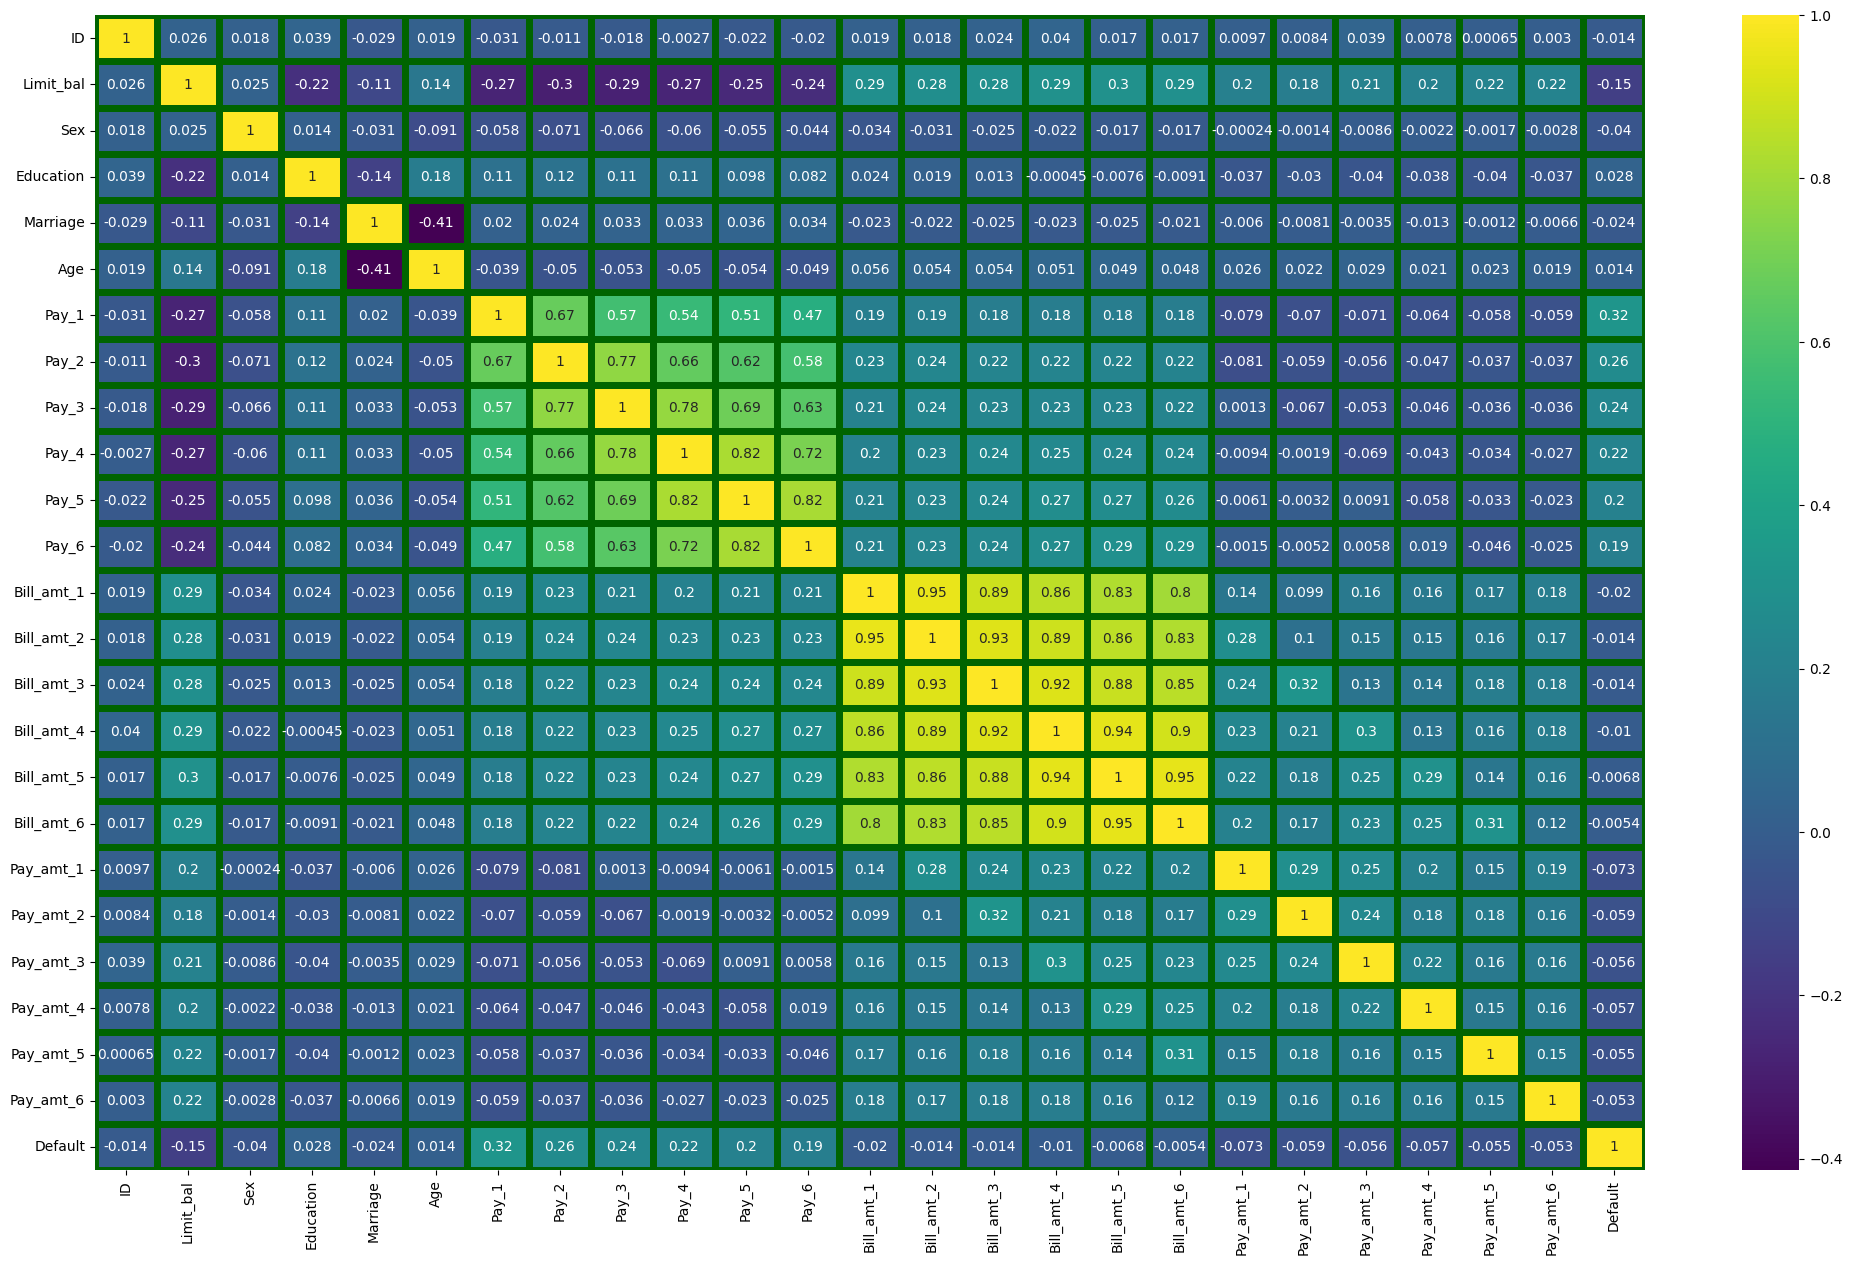

In [12]:
plt.figure(figsize = [25, 15], clear = True, facecolor = "white")
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "#006400", cmap = "viridis");

In [13]:
# Understand the data by checking the first row

df.loc[0]

ID                1.0
Limit_bal     20000.0
Sex               2.0
Education         2.0
Marriage          1.0
Age              24.0
Pay_1             2.0
Pay_2             2.0
Pay_3            -1.0
Pay_4            -1.0
Pay_5            -2.0
Pay_6            -2.0
Bill_amt_1     3913.0
Bill_amt_2     3102.0
Bill_amt_3      689.0
Bill_amt_4        0.0
Bill_amt_5        0.0
Bill_amt_6        0.0
Pay_amt_1         0.0
Pay_amt_2       689.0
Pay_amt_3         0.0
Pay_amt_4         0.0
Pay_amt_5         0.0
Pay_amt_6         0.0
Default           1.0
Name: 0, dtype: float64

In [14]:
# Sorted the repayment status codes in PAY_X columns by melting them into 1 column
# Noticed there are 2 undocumented codes: 0,-2

pay = df[['Pay_1','Pay_2','Pay_3','Pay_4','Pay_5','Pay_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


In [15]:
# Got the proportion of customers who had default payment in the next month (Oct.2005)?
# About 22% customers had default payment next month

df['Default'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Default, dtype: float64

In [16]:
# Check if there is any duplicate IDs
condition = bool(df.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          30000 non-null  int64  
 1   Limit_bal   30000 non-null  float64
 2   Sex         30000 non-null  int64  
 3   Education   30000 non-null  int64  
 4   Marriage    30000 non-null  int64  
 5   Age         30000 non-null  int64  
 6   Pay_1       30000 non-null  int64  
 7   Pay_2       30000 non-null  int64  
 8   Pay_3       30000 non-null  int64  
 9   Pay_4       30000 non-null  int64  
 10  Pay_5       30000 non-null  int64  
 11  Pay_6       30000 non-null  int64  
 12  Bill_amt_1  30000 non-null  float64
 13  Bill_amt_2  30000 non-null  float64
 14  Bill_amt_3  30000 non-null  float64
 15  Bill_amt_4  30000 non-null  float64
 16  Bill_amt_5  30000 non-null  float64
 17  Bill_amt_6  30000 non-null  float64
 18  Pay_amt_1   30000 non-null  float64
 19  Pay_amt_2   30000 non-nul

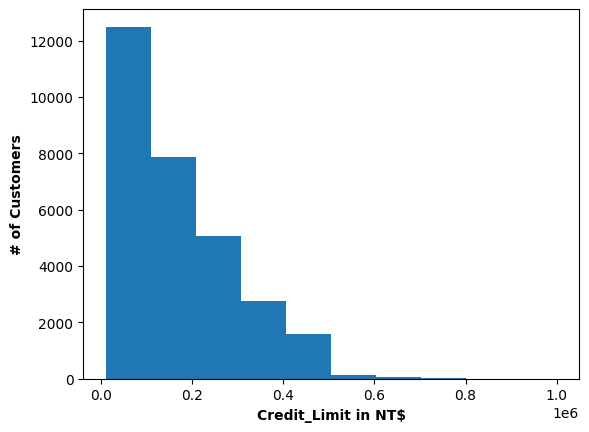

In [18]:
# Use histogram to view the distribution of credit limit

plt.hist(df["Limit_bal"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

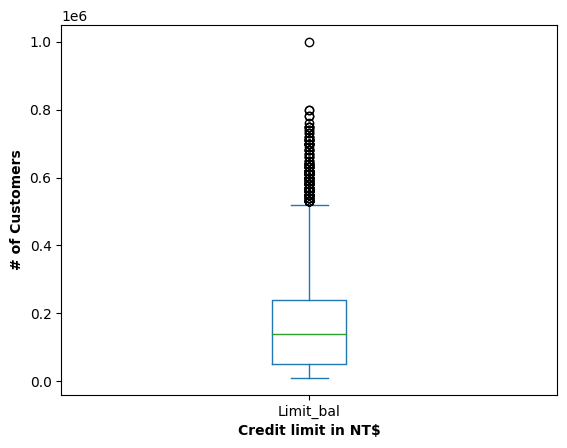

In [19]:
# Use boxplot to identify any outlier in credit limit

df["Limit_bal"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [20]:
# Take a close look at the outlier
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['Limit_bal']>900000]
outliers

,ID,Limit_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_amt_4,Bill_amt_5,Bill_amt_6,Pay_amt_1,Pay_amt_2,Pay_amt_3,Pay_amt_4,Pay_amt_5,Pay_amt_6,Default
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


In [21]:
# Get SEX column's distribution. 1: male; 2: female
# No undocumented SEX code

df["Sex"].value_counts()

2    18112
1    11888
Name: Sex, dtype: int64

In [22]:
# Change sex code to 'F' and 'M' and use category as datatype

df["Sex"]=df["Sex"].map({1:'M',2:'F'}).astype('category')
df["Sex"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [23]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

df["Education"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [24]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df["Education"] = df["Education"].replace({4:0,5:0,6:0})
df["Education"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: Education, dtype: int64

In [25]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

df["Marriage"].unique()

array([1, 2, 3, 0])

In [26]:
# How many customers had "MARRIAGE" status as 0?

df["Marriage"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: Marriage, dtype: float64

In [27]:
# Combine 0 and 3 by changing the value 3 into 0
df["Marriage"] = df["Marriage"].replace({3:0})

df["Marriage"].value_counts(normalize=True)

2    0.532133
1    0.455300
0    0.012567
Name: Marriage, dtype: float64

In [28]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (df.Pay_1 >1) | (df.Pay_2 >1) | (df.Pay_3 >1) | (df.Pay_4 >1) | (df.Pay_5 >1) | (df.Pay_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

In [29]:
def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"

    fig, ax = plt.subplots(figsize=(6, 5))
    palette = ['silver']
    bar_width = 0.5
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name , color=palette)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name )

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)


    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

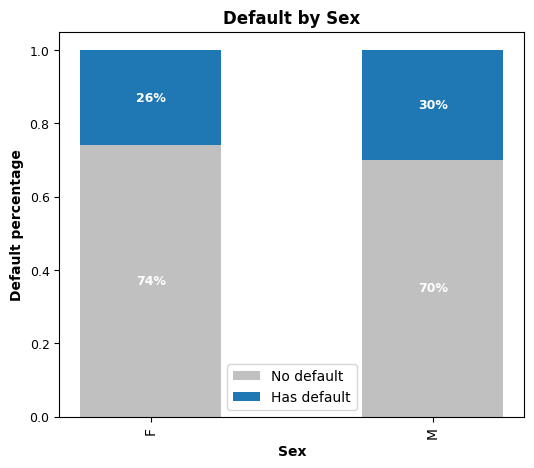

In [30]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_stacked_bar('Sex')

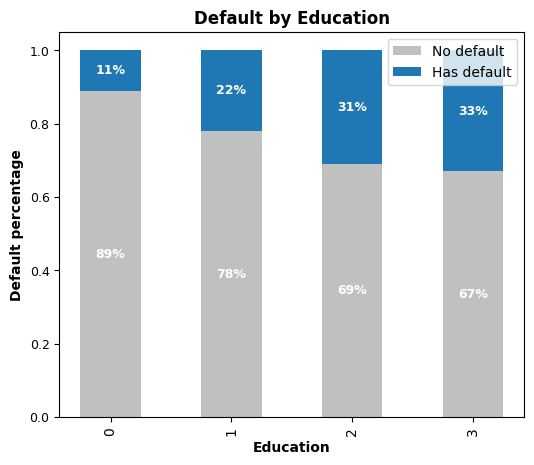

In [31]:
# Plot a stacked bar chart to show default by education level

create_stacked_bar('Education')

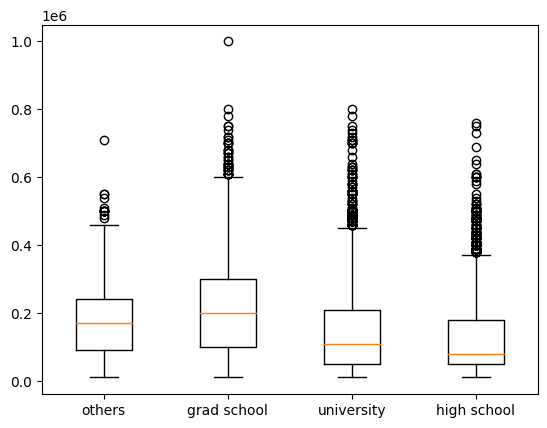

In [32]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [0,1,2,3]:
    temp = df.loc[df.Education == i, "Limit_bal"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

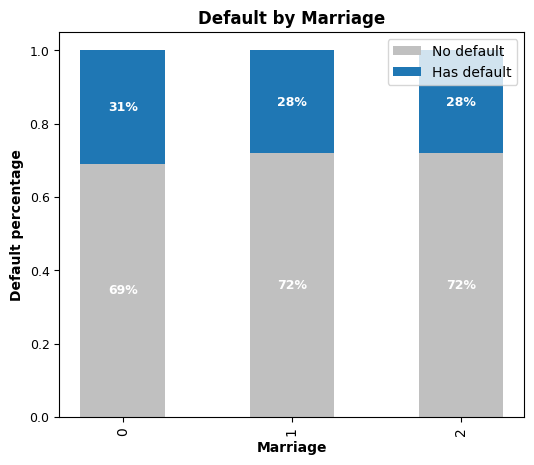

In [33]:
# Plot a stacked bar chart to visualize default and non-default distribution by marital status

create_stacked_bar('Marriage')

In [34]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['Age'] = pd.cut(df['Age'],bins=bins, labels=labels,right=False)


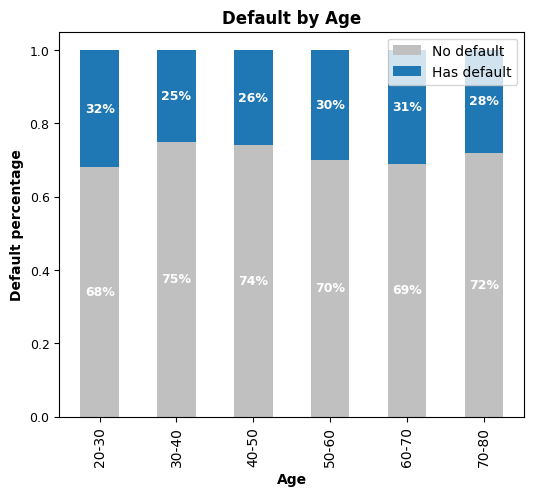

In [35]:
# Plot a stacked bar chart to visualize default and non-default by age

create_stacked_bar('Age')

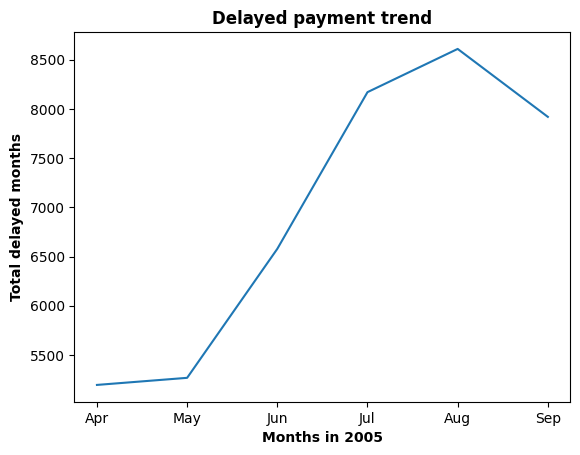

In [36]:
# Subset a dataframe with the records that have default

has_default = df[df['HAS_DEF']== 1]
default_trend = has_default[['Pay_6','Pay_5','Pay_4','Pay_3','Pay_2','Pay_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['Pay_6','Pay_5','Pay_4','Pay_3','Pay_2','Pay_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

Delay in payment increased significantly from May 2005 to July 2005, peaked in August 2005, and then began to improve in September 2005 (PAY_1).

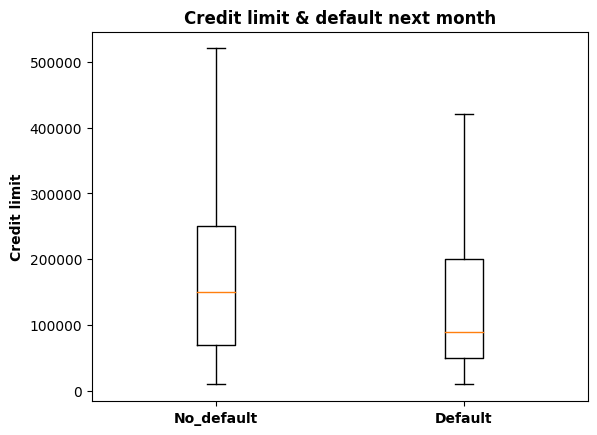

In [37]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = df.loc[df['Default'] == 0,'Limit_bal']
def1 = df.loc[df['Default'] == 1,'Limit_bal']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

Higher credit limits for customers were associated with lower rates of default payments.

**Hypothesis 1**
Research Question 1: Is there an association between Age and likelihood of default payment, and are the default payment rates significantly different for each level of age groups?
H0: There is no association between age group and likelihood of default payment, nor do age groups significantly affect and are dependent on default payment next month.
H1: Depending on age level, age groups and default payment rates differ distinctly, and these age group differences are related to and are dependent on default payment.


	**Null hypothesis**		: Age does not affect default likelihood of payment.
	**Alternative hypothesis**	: Age impacts default likelihood of payment.


In [38]:
# Hypothesis 1
#Get the contigence table of age and default data

age_def_contigence = pd.crosstab(df['HAS_DEF'], df['Age'], margins=False)
# Use chi-squared test to test if age affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(age_def_contigence)

p

6.185243361338736e-26

In [39]:
# Hypothesis 1
# Get the contigence table of age and default data

age_def_contigence = pd.crosstab(df['HAS_DEF'], df['Age'], margins=False)
# Use chi-squared test to test if age affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(age_def_contigence)

p

6.185243361338736e-26

Hence null hypothesis was rejected, and alternative hypothesis was accepted, that age affects default probability, because the p value is less than the significance level.

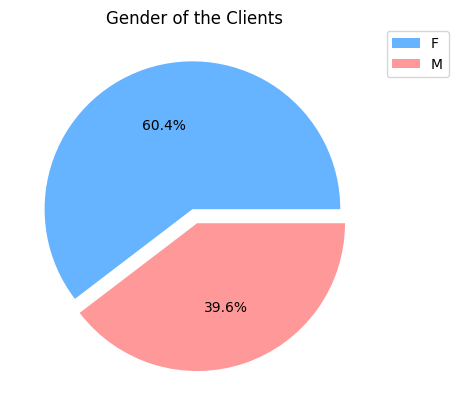

In [40]:
# Gender of the clients

colors = ['#66b3ff', '#ff9999']
data = df["Sex"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%',  explode=[0.05, 0.05], colors=colors, legend=True, title='Gender of the Clients', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Research Question 2: Does gender plays a role in default payment? Is there a relationship between gender and the default payment? Do male and female preferences for default payments differ from one another?
H0: There is no association between default payments between male and female credit card users. Gender and default payment is independent of each other.
H1: There is a relationship between gender and default payment, and Gender and Default payment are dependent on each other.



**Hypothesis 2**
	**Null hypothesis	**	: Sex has no impact on default payment.
	**Alternative hypothesis**	: Sex has impact on default payment.


In [131]:
# Hypothesis 2
# Does Gender Inequality exists?
# Chi2Square test to find  Gender and Default Payment are not independent
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency

# defining the table
data3 = pd.crosstab(df['Default'], df['Sex'])
stat, p, dof, expected = chi2_contingency(data3)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

print("Gender Inequality exists ")

p value is 4.944678999412044e-12
Dependent (reject H0)
Gender Inequality exists 


Null Hypothesis was rejected - Gender has impact on default payment.

**Hypothesis 3**
Research Question 3: Does higher education play a role in default payment? Is there a relationship between education level and default payment, and the probability of default payment significantly different for various levels of higher education?
H0: The level of education has no discernible influence on default payments, and there is no association between probability default payment next month and different levels of higher education.
H1: Education level and default payment differ depending on education level, and education levels and default payment are dependent on each other.


Hypothesis 3
	Null hypothesis		: Education does not affect default payment.
	Alternative hypothesis	: Education impacts default payment.


In [132]:
# Hypothesis 3
# Chi2Square test to find  Education and Default Payment are not independent
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency

# defining the table
data3 = pd.crosstab(df['Default'], df['Education'])
stat, p, dof, expected = chi2_contingency(data3)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

print("Education level is associated with Default Payment")

p value is 1.2332626245415605e-32
Dependent (reject H0)
Education level is associated with Default Payment


In [ ]:
# Get the contigence table of education and default data
# Hypothesis 3
edu_def_contigence = pd.crosstab(df['Default'], df['Education'], margins=False)
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

1.2332626245415605e-32

Preprocessing

In [52]:
# Preprocess the data
X = df.drop("Default", axis=1)
y = df["Default"]

In [45]:
X.shape

(30000, 25)

In [46]:
y.shape

(30000,)

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Resampling using SMOTE ENN
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

After SMOTE-ENN dataset was balanced.

In [54]:
X_resampled.shape

(27454, 24)

In [55]:
y_resampled.shape

(27454,)

In [129]:
print(len(X_resampled))
print(len(y_resampled))

27454
27454


In [128]:
print('Resampled dataset shape {}'.format(Counter(y_resampled))) # Resampled dataset shape Counter({0: 900, 1: 900});
print(type(X_resampled)); print(X_resampled); print(y_resampled);

Resampled dataset shape Counter({1: 17396, 0: 10058})
<class 'pandas.core.frame.DataFrame'>
          ID      Limit_bal  Sex  Education  Marriage  Age  Pay_1  Pay_2  \
0          3   90000.000000    2          2         2   34      0      0   
1          5   50000.000000    1          2         1   57     -1      0   
2          6   50000.000000    1          1         2   37      0      0   
3          8  100000.000000    2          2         2   23      0     -1   
4         10   20000.000000    1          3         2   35     -2     -2   
...      ...            ...  ...        ...       ...  ...    ...    ...   
27449  21167  462164.268649    2          1         1   41      2      1   
27450   3485   44423.502270    1          1         1   38      0      0   
27451  10290  237722.924137    1          1         1   32      1      1   
27452   2490  261129.220455    2          1         1   34      1      1   
27453   8231   53898.909657    2          1         1   33      2      2

In [60]:
df1 = pd.DataFrame(y_resampled)


<Axes: >

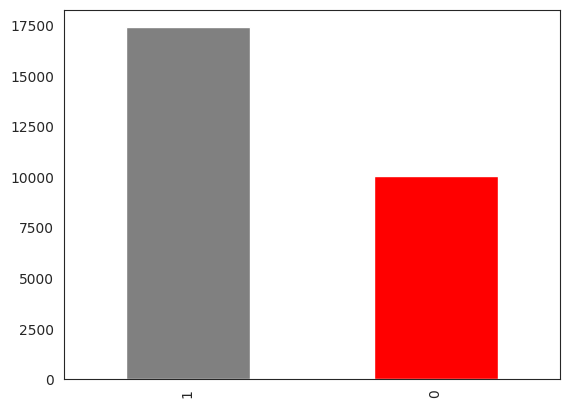

In [130]:
color_dict ={'red', 'grey'}
df1['Default'].value_counts().plot.bar(color=color_dict)

In [63]:
df.shape

(30000, 25)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.4, shuffle = True, random_state = 11)

In [65]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [66]:
# Train the model
model.fit(np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1), np.array(y_train), epochs=10, batch_size=32)

Epoch 1/10
515/515 [==============================] - 7s 10ms/step - loss: 0.5483 - accuracy: 0.6929
Epoch 2/10
515/515 [==============================] - 9s 17ms/step - loss: 0.4997 - accuracy: 0.7447
Epoch 3/10
515/515 [==============================] - 9s 18ms/step - loss: 0.4784 - accuracy: 0.7689
Epoch 4/10
515/515 [==============================] - 5s 10ms/step - loss: 0.4913 - accuracy: 0.7648
Epoch 5/10
515/515 [==============================] - 5s 9ms/step - loss: 0.4874 - accuracy: 0.7638
Epoch 6/10
515/515 [==============================] - 5s 10ms/step - loss: 0.5327 - accuracy: 0.7165
Epoch 7/10
515/515 [==============================] - 4s 9ms/step - loss: 0.4958 - accuracy: 0.7550
Epoch 8/10
515/515 [==============================] - 5s 9ms/step - loss: 0.5119 - accuracy: 0.7411
Epoch 9/10
515/515 [==============================] - 5s 10ms/step - loss: 0.4727 - accuracy: 0.7714
Epoch 10/10
515/515 [==============================] - 5s 9ms/step - loss: 0.4608 - accuracy: 

In [67]:
# Evaluate the model
y_pred = model.predict(np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("Precision:\n", precision)
print("Recall:\n", recall)

344/344 [==============================] - 2s 3ms/step
Confusion matrix:
 [[3138  826]
 [1584 5434]]
Precision:
 [0.63904571 0.86805112 1.        ]
Recall:
 [1.         0.77429467 0.        ]


344/344 [==============================] - 1s 3ms/step
Sensitivity: 0.774294670846395
Specificity: 0.7916246215943491
AUC score: 0.7829596462203722
Accuracy score: 0.7805499908941905
LSTM : F1 Score 0.82, Accuracy 0.78


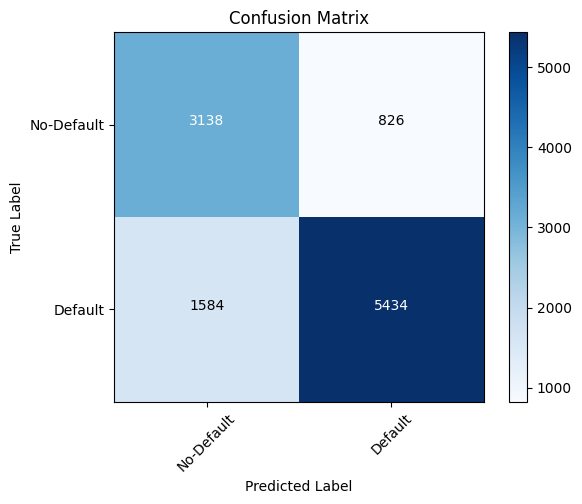

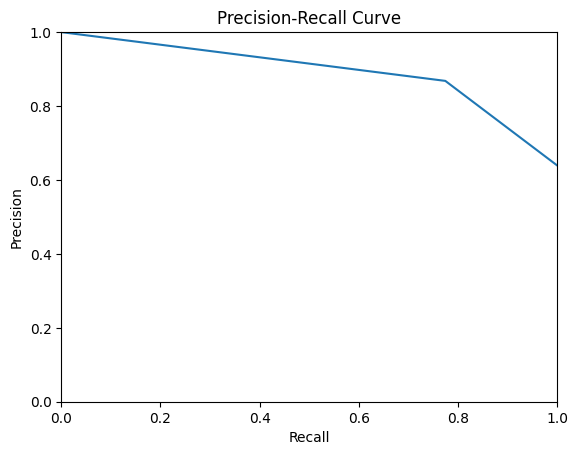

In [68]:
# Evaluate the model
y_pred = model.predict(np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("AUC score:", auc_score)
print("Accuracy score:", accuracy)
print("LSTM : F1 Score {}, Accuracy {}".format(round(f1_score(y_test,y_pred),2),round(accuracy_score(y_test,y_pred),2)))
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

# Plot the precision and recall curves
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()


Stacking Ensemble using AdaBoost, RandomForest and LSTM

In [69]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [109]:
# Define the base models
model1 = AdaBoostClassifier(learning_rate=1, n_estimators=100)
model2 = RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=8,
                       max_features='auto', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=500)
model3 = Sequential([
    LSTM(64, input_shape=(X.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

In [110]:
# Train the base models and make predictions on the training data
model1.fit(X_train, y_train)
y_pred1 = model1.predict_proba(X_train)[:, 1]

model2.fit(X_train, y_train)
y_pred2 = model2.predict_proba(X_train)[:, 1]

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, verbose=0)
y_pred3 = model3.predict(np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)).ravel()

# Create the meta features for the stacking ensemble
X_meta = np.column_stack((y_pred1, y_pred2, y_pred3))

515/515 [==============================] - 2s 3ms/step


Base models and predictions were made on the training data. The predictions from the base models AdaBoost, Random Forest, LSTM were altered, creating a new dataset along with the actual labels. The original class labels form the dependent variable, whereas the target/class labels that are predicted from the base learners are used as independent features in the new dataset.

In [111]:
# Define the meta model
meta_model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(1, activation='sigmoid')
])
meta_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
### Train the meta model on the meta features
meta_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
meta_model.fit(X_meta, y_train, epochs=30, batch_size=64, verbose=0)

# Make predictions on the test data
y_pred1 = model1.predict(X_test)
y_pred1_prob = model1.predict_proba(X_test)[:, 1]

y_pred2 = model2.predict(X_test)
y_pred2_prob = model2.predict_proba(X_test)[:, 1]

y_pred3 = model3.predict(X_test)
y_pred3_prob = model3.predict(np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)).ravel()

X_meta_test = np.column_stack((y_pred1, y_pred2, y_pred3_prob))


y_pred = meta_model.predict(X_meta_test)

# Make predictions on the test set using the stacking ensemble

y_pred_ensemble = np.round(meta_model.predict(np.column_stack((model1.predict_proba(X_test)[:, 1], model2.predict_proba(X_test)[:, 1], np.round(model3.predict(np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)).ravel())))))

344/344 [==============================] - 0s 749us/step


In [78]:
# Evaluate the performance of the ensemble model
from sklearn.metrics import roc_curve
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_ensemble)
fpr, tpr, _ = roc_curve(y_test, y_pred_ensemble)

Confusion matrix:
 [[1981 1983]
 [ 230 6788]]
Precision: 0.77
Recall: 0.97
Accuracy: 0.80
AUC: 0.81


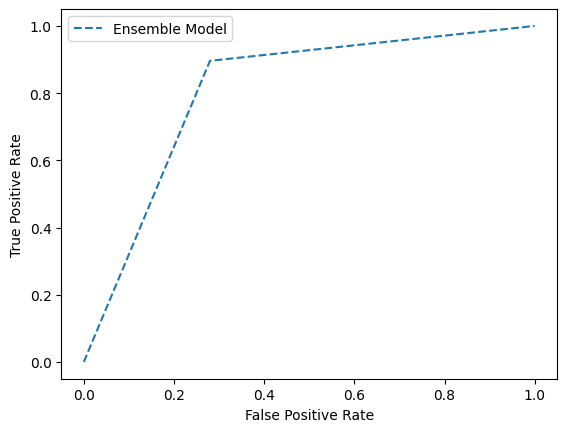

In [79]:
# Print the evaluation metrics and plot the ROC curve
print("Confusion matrix:\n", cm)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Accuracy: {:.2f}".format(accuracy))
print("AUC: {:.2f}".format(auc))
plt.plot(fpr, tpr, linestyle='--', label='Ensemble Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [80]:
#precision_recall curve
from sklearn.metrics import precision_recall_curve

def precision_recall(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return precision, recall, thresholds

Sensitivity: 0.9672271302365346
Specificity: 0.49974772956609487
AUC score: 0.8081781703614088
Accuracy score: 0.7984884356219268


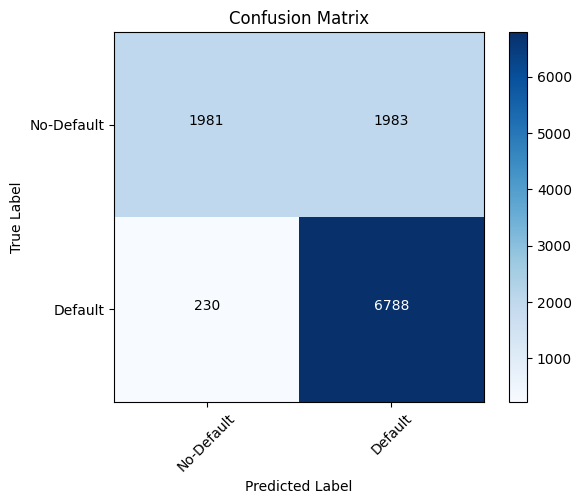

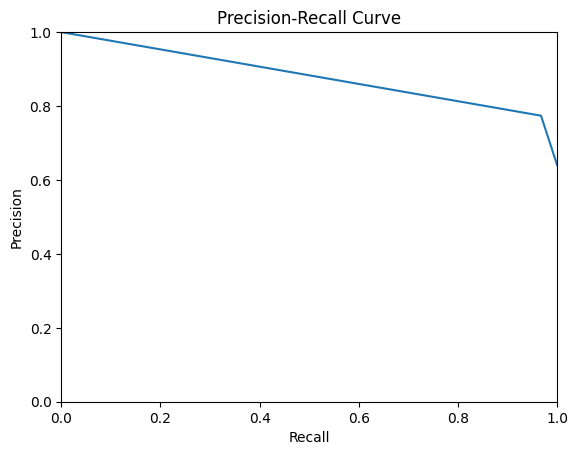

In [81]:
#y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_ensemble)
accuracy = accuracy_score(y_test, y_pred)

# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("AUC score:", auc_score)
print("Accuracy score:", accuracy)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

# Plot the precision and recall curves
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()

344/344 [==============================] - 1s 3ms/step


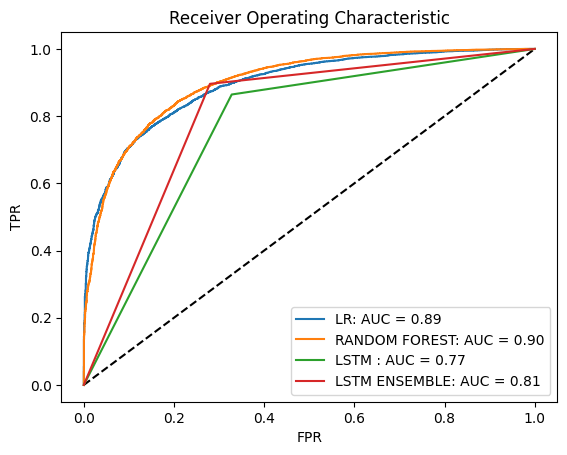

In [82]:
# Add the models to view on the ROC plot
#ROC Curve
from sklearn.metrics import roc_curve
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_curve , auc
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
y_pred_proba1 = model1.predict_proba(X_test)[::,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)

y_pred_proba2 = model2.predict_proba(X_test)[::,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)



y_pred_proba4 = np.round(model3.predict(np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)).ravel())
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_proba4)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba4)


fpr6, tpr6, _ = roc_curve(y_test, y_pred_ensemble)
auc6 = metrics.roc_auc_score(y_test, y_pred_ensemble)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= 'LR: AUC = {0:.2f}'.format(auc1))
plt.plot(fpr2, tpr2, label= 'RANDOM FOREST: AUC = {0:.2f}'.format(auc2))
plt.plot(fpr4, tpr4, label= 'LSTM : AUC = {0:.2f}'.format(auc4))
plt.plot(fpr6, tpr6, label= 'LSTM ENSEMBLE: AUC = {0:.2f}'.format(auc6))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

Performance of Base Model 1 (AdaBoostClassifier):
Sensitivity: 0.8740381875178114
Specificity: 0.7164480322906155


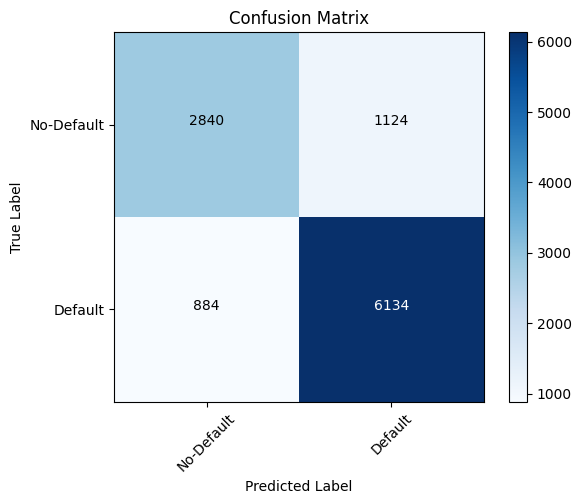

Confusion matrix:
 [[2840 1124]
 [ 884 6134]]
Precision: 0.85
Recall: 0.87
Accuracy: 0.82
AUC: 0.89
Adaboost : F1 Score 0.86

Performance of Base Model 2 (RandomForestClassifier):
Sensitivity: 0.9672271302365346
Specificity: 0.49974772956609487
Confusion matrix:
 [[1981 1983]
 [ 230 6788]]


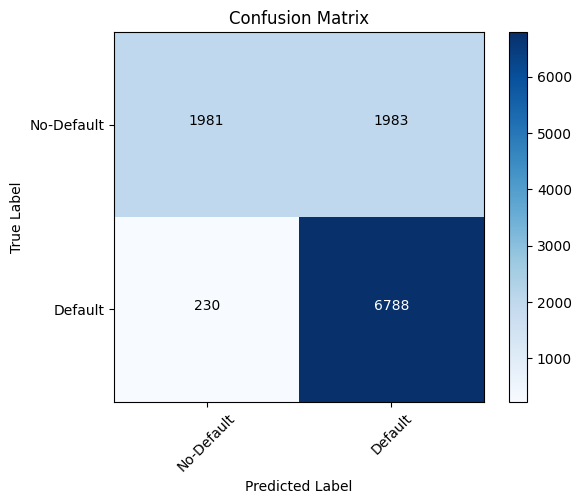

Confusion matrix:
 [[1981 1983]
 [ 230 6788]]
Precision: 0.77
Recall: 0.97
Accuracy: 0.80
AUC: 0.90
RandomForest : F1 Score 0.86

Performance of Base Model 3 LSTM:
344/344 [==============================] - 1s 3ms/step
Sensitivity: 0.8643488173268737
Specificity: 0.6720484359233098
Confusion matrix:
 [[2664 1300]
 [ 952 6066]]
Confusion matrix:
 [[2664 1300]
 [ 952 6066]]
Precision: 0.82
Recall: 0.86
Accuracy: 0.79
AUC: 0.77
LSTM : F1 Score 0.84

Performance of ENSEMBLE(LSTM):
Sensitivity: 0.9672271302365346
Specificity: 0.49974772956609487
Confusion matrix:
 [[1981 1983]
 [ 230 6788]]
Precision: 0.77
Recall: 0.97
Accuracy: 0.80
AUC: 0.81
LSTM Ensemble : F1 Score 0.86


In [83]:
# Evaluate the performance of each base model
print("Performance of Base Model 1 (AdaBoostClassifier):")
y_pred1 = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)
auc1 = roc_auc_score(y_test, y_pred_proba1)
print("Confusion matrix:\n", cm)
print("Precision: {:.2f}".format(precision1))
print("Recall: {:.2f}".format(recall1))
print("Accuracy: {:.2f}".format(accuracy1))
print("AUC: {:.2f}".format(auc1))
print("Adaboost : F1 Score {}".format(round(f1_score(y_test,y_pred1),2)))

print("\nPerformance of Base Model 2 (RandomForestClassifier):")
y_pred2 = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Confusion matrix:\n", cm)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()


precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_pred_proba2)
print("Confusion matrix:\n", cm)
print("Precision: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("Accuracy: {:.2f}".format(accuracy2))
print("AUC: {:.2f}".format(auc2))
print("RandomForest : F1 Score {}".format(round(f1_score(y_test,y_pred2),2)))

print("\nPerformance of Base Model 3 LSTM:")
y_pred3 = np.round(model3.predict(X_test))
cm3 = confusion_matrix(y_test, y_pred3)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm3.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Confusion matrix:\n", cm3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
auc3 = roc_auc_score(y_test, y_pred_proba4)
print("Confusion matrix:\n", cm3)
print("Precision: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))
print("Accuracy: {:.2f}".format(accuracy3))
print("AUC: {:.2f}".format(auc3))
print("LSTM : F1 Score {}".format(round(f1_score(y_test,y_pred3),2)))


print("\nPerformance of ENSEMBLE(LSTM):")
cm4 = confusion_matrix(y_test, y_pred)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm4.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
auc4 = roc_auc_score(y_test, y_pred_ensemble)
print("Confusion matrix:\n", cm4)
print("Precision: {:.2f}".format(precision4))
print("Recall: {:.2f}".format(recall4))
print("Accuracy: {:.2f}".format(accuracy4))
print("AUC: {:.2f}".format(auc4))
print("LSTM Ensemble : F1 Score {}".format(round(f1_score(y_test,y_pred),2)))


Ensemble model accomplished an accuracy of 0.89 and Recall of 0.91, Precision of 0.9, Sensitivity of 0.99 and Specificity of 0.82

Confusion matrix:
 [[2868 1096]
 [ 995 6023]]
Precision: 0.85
Sensitivity: 0.8582217155884867
Specificity: 0.7235116044399597
AUC score: 0.7908666600142231
Accuracy score: 0.8095975232198143
DecisionTree : F1 Score 0.85


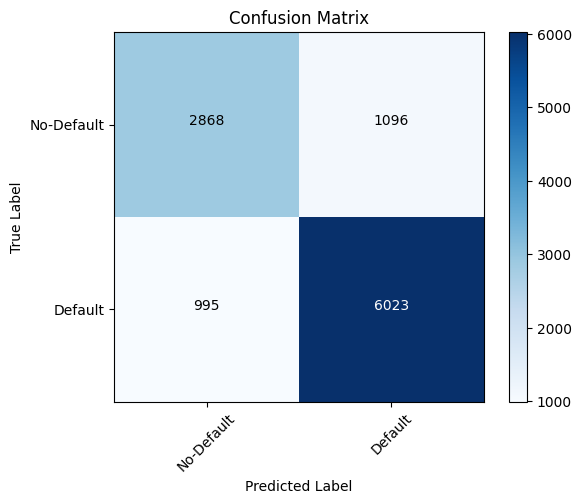

In [84]:
# Decision Tree
model1=  DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_train)
y_pred1 = model1.predict(X_test)
y_pred1_prob = model1.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred1_prob)
accuracy = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
print("Confusion matrix:\n", cm)
print("Precision: {:.2f}".format(precision))

# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("AUC score:", auc_score)
print("Accuracy score:", accuracy)

print("DecisionTree : F1 Score {}".format(round(f1_score(y_test,y_pred1),2)))
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()



Decision Tree classifier accomplished an accuracy of 0.81 in predicting the default payment.

Confusion matrix:
 [[2915 1049]
 [ 726 6292]]
Precision: 0.86
Sensitivity: 0.896551724137931
Specificity: 0.7353683148335015
AUC score: 0.8944605179876225
Accuracy score: 0.8383718812602441
Precision: 0.8571039367933524
Gradient Boosting : F1 Score 0.88


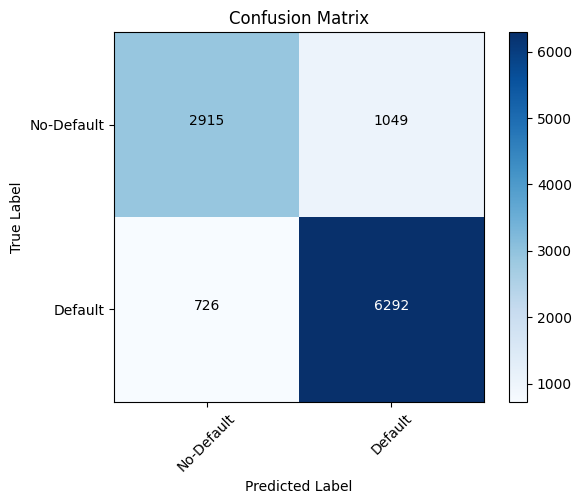

In [85]:
# Gradient Boosting
model1=  GradientBoostingClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_train)
y_pred1 = model1.predict(X_test)
y_pred1_prob = model1.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
auc_score = roc_auc_score(y_test, y_pred_proba1)
accuracy = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
print("Confusion matrix:\n", cm)
print("Precision: {:.2f}".format(precision))


# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("AUC score:", auc_score)
print("Accuracy score:", accuracy)
print("Precision:", precision)
print("Gradient Boosting : F1 Score {}".format(round(f1_score(y_test,y_pred1),2)))
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()


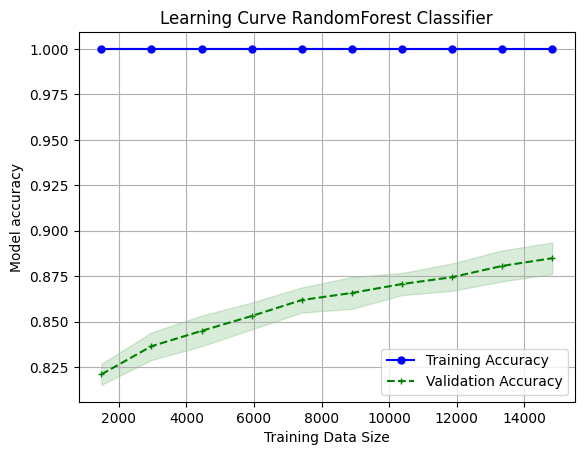

In [86]:
#Learning curve Random forest
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(), X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve RandomForest Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The model shows overfitting in training data. The model shows high variance between training and validation accuracy.

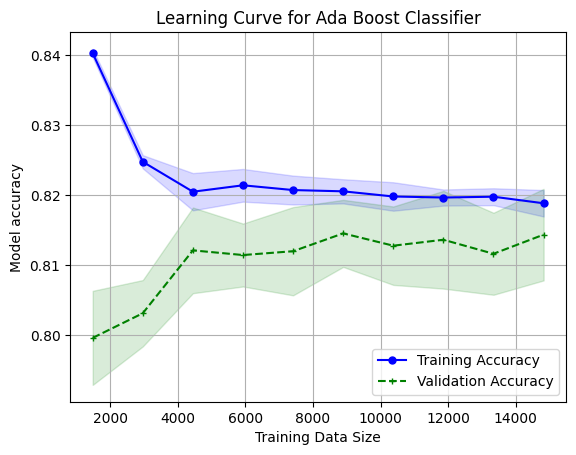

In [88]:
# Learning Curve For AdaBoost Classifier
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=AdaBoostClassifier(), X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for Ada Boost Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The model shows a steady increase in validation accuracy as more samples are added, the training accuracy decreases when mode samples are added and becomes steady with no signs of overfitting and was stable in its performance.



In [ ]:
# building a classifier for ada boost
clf_ada = AdaBoostClassifier()
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Seting up the hyperparameter search
# looking at  setting up your search for n_estimators, learning_rate
param_dist = {"n_estimators": [10, 100],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1,1.1]}


# Running a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fiting the model on the training data
ada_search.fit(X_train, y_train)

# Making predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)
print(ada_search.best_estimator_)

In [87]:
# defining the classifier
model = AdaBoostClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [10, 50, 100]

# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1,0.5, 1.0, 1.1, 1.2]


# defining the CV
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3)

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')


# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(X_train, y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.819087 using {'learning_rate': 1.0, 'n_estimators': 100}


GridSearch is used to discover the best set of hyperparameters that optimize the performance metrics of a machine learning model. Certain hyperparameters for AdaBoost that can be tuned using grid search are n_estimators and learning rate.

Best hyperparameters was found with 1.2 learning rate and estimators with 100.

In [89]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
params_rf = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto','sqrt', 'log2'],
    'max_depth': [4,5, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42],
    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:3}]
}
clf_rf = RandomForestClassifier()
rand_rf = RandomizedSearchCV(clf_rf, params_rf, scoring = 'accuracy', cv=kf)
rand_rf.fit(X_train, y_train)
print('RandomForest Best estimator:')
print(rand_rf.best_estimator_)
print('RandomForest Best score:')
print(rand_rf.best_score_ )

RandomForest Best estimator:
RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=8,
                       max_features='log2', n_estimators=500, random_state=42)
RandomForest Best score:
0.7956538443465979


Hyperparameters estimators, maximum features in the tree, maximum depth in the tree, minimum samples split in the tree, minimum samples leaf, random state, class weight for Random Forest was tuned using Randomized search.

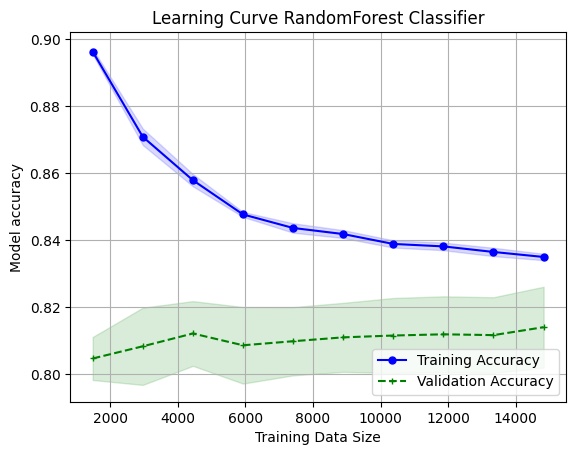

In [90]:
#Learning curve with Hyperparameters
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=500, random_state=42), X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve RandomForest Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The model shows a good fit. The training accuracy decreases and becomes steady while the validation accuracy increases and becomes steady as more samples are added. The model shows good bias and variance trade off.

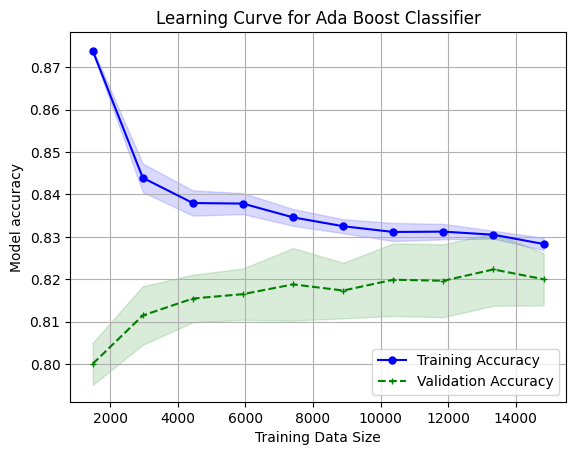

In [91]:
# Learning Curve For AdaBoost Classifier for hyperparameters
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=AdaBoostClassifier(learning_rate=1.2, n_estimators=100), X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for Ada Boost Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The model shows no overfitting or underfitting. The Training curve decreases as more samples are added and becomes stable at a particular point. The validation curve increases slowly as more samples are added and maintains steadily after a point. The model shows a good bias variance trade off.

The model shows a steady increase in validation accuracy as more samples are added, the training accuracy decreases when mode samples are added and becomes steady with no signs of overfitting and was stable in its performance.



In [92]:
clf_boosting = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
clf_boosting.fit(X_train, y_train)
predictions = clf_boosting.predict(X_test)
print("For Boosting : F1 Score {}, Accuracy {}".format(round(f1_score(y_test,predictions),2),round(accuracy_score(y_test,predictions),2)))
cm3 = confusion_matrix(y_test, predictions)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm3.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
precision3 = precision_score(y_test, predictions)
recall3 = recall_score(y_test, predictions)
auc3 = roc_auc_score(y_test, predictions)
print("Confusion matrix:\n", cm3)
print("Precision: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))


For Boosting : F1 Score 0.86, Accuracy 0.82
Sensitivity: 0.878027928184668
Specificity: 0.7290615539858728
Confusion matrix:
 [[2890 1074]
 [ 856 6162]]
Precision: 0.85
Recall: 0.88


Boosting ensemble with decision tree as base learner got an accuracy of 0.82 in predicting the default payment rate.

In [93]:
clf_bagging = RandomForestClassifier()
clf_bagging.fit(X_train, y_train)
predictions = clf_bagging.predict(X_test)
print("For Bagging : F1 Score {}, Accuracy {}".format(round(f1_score(y_test,predictions),2),round(accuracy_score(y_test,predictions),2)))
cm3 = confusion_matrix(y_test, predictions)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm3.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
precision3 = precision_score(y_test, predictions)
recall3 = recall_score(y_test, predictions)
auc3 = roc_auc_score(y_test, predictions)
print("Confusion matrix:\n", cm3)
print("Precision: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))


For Bagging : F1 Score 0.91, Accuracy 0.89
Sensitivity: 0.9243374180678255
Specificity: 0.8176084762865792
Confusion matrix:
 [[3241  723]
 [ 531 6487]]
Precision: 0.90
Recall: 0.92


Bagging ensemble predicted the default payment with an accuracy of 0.89.

**Stacking Ensemble using multiple models**



A stacked model using KNN, Gradient Boost, MLP Classifier and Random Forest was used as base models and Logistic Regression was used as a meta model. Base models were defined.

In [94]:
# Define the base models
model1 = KNeighborsClassifier()
model2 = GradientBoostingClassifier()
model3 = MLPClassifier()
model4 = RandomForestClassifier()

# Train the base models and make predictions on the training data
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_train)
y_pred1_prob = model1.predict_proba(X_train)[:, 1]

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_train)
y_pred2_prob = model2.predict_proba(X_train)[:, 1]

model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_train)
y_pred3_prob = model3.predict_proba(X_train)[:, 1]

model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_train)
y_pred4_prob = model4.predict_proba(X_train)[:, 1]



In [95]:
# Use the predicted values as features to train the meta-model
X_meta_train = np.column_stack((y_pred1_prob, y_pred2_prob, y_pred3_prob, y_pred4_prob))
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Make predictions on the test data
y_pred1 = model1.predict(X_test)
y_pred1_prob = model1.predict_proba(X_test)[:, 1]

y_pred2 = model2.predict(X_test)
y_pred2_prob = model2.predict_proba(X_test)[:, 1]

y_pred3 = model3.predict(X_test)
y_pred3_prob = model3.predict_proba(X_test)[:, 1]

y_pred4_prob = model4.predict_proba(X_test)[:, 1]
X_meta_test = np.column_stack((y_pred1_prob, y_pred2_prob, y_pred3_prob, y_pred4_prob))

y_pred = meta_model.predict(X_meta_test)

The predictions from the models KNN, Random Forest, Gradient Boosting and MLP were combined and given to the meta model Logistic Regression.

In [96]:
y_pred_ensemble = meta_model.predict_proba(X_meta_test)[:, 1]

In [97]:
#precision_recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

def precision_recall(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return precision, recall, thresholds

Sensitivity: 0.9475634083784554
Specificity: 0.8433400605449042
AUC score: 0.8954517344616798
Accuracy score: 0.9099435439810599


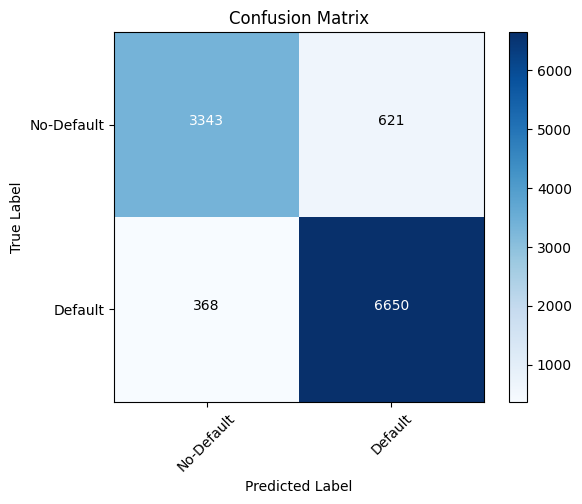

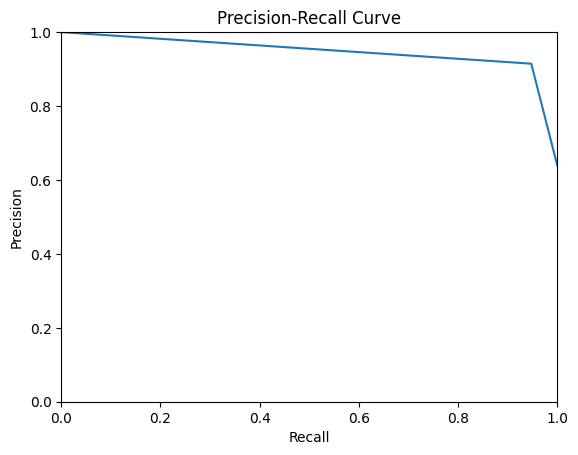

In [98]:
cm = confusion_matrix(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("AUC score:", auc_score)
print("Accuracy score:", accuracy)
f1_score(y_test, y_pred, average='weighted')
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

# Plot the precision and recall curves
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()

Performance of Base Model 1 (KNN):
Sensitivity: 0.957395269307495
Specificity: 0.7187184661957619
Confusion matrix:
 [[2849 1115]
 [ 299 6719]]


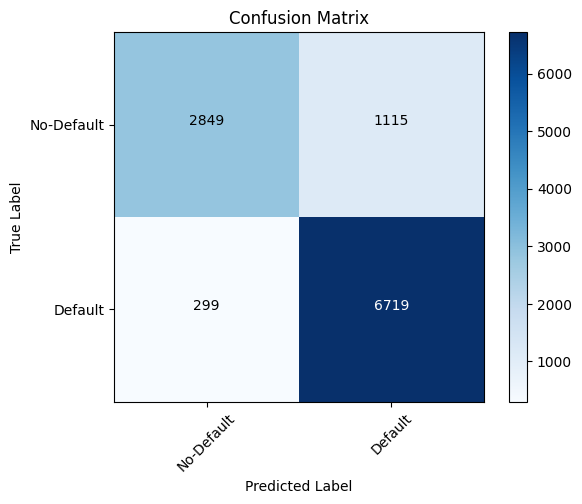

Confusion matrix:
 [[2849 1115]
 [ 299 6719]]
Precision: 0.86
Recall: 0.96
Accuracy: 0.87
AUC: 0.84
For KNN : F1 Score 0.9

Performance of Base Model 2 (Gradient Boosting):
Sensitivity: 0.896551724137931
Specificity: 0.7353683148335015
Confusion matrix:
 [[2915 1049]
 [ 726 6292]]
Confusion matrix:
 [[2915 1049]
 [ 726 6292]]
Precision: 0.86
Recall: 0.90
Accuracy: 0.84
AUC: 0.82
For GB : F1 Score 0.81

Performance of Base Model MLP:
Sensitivity: 0.9243374180678255
Specificity: 0.8176084762865792
Confusion matrix:
 [[2010 1954]
 [ 904 6114]]


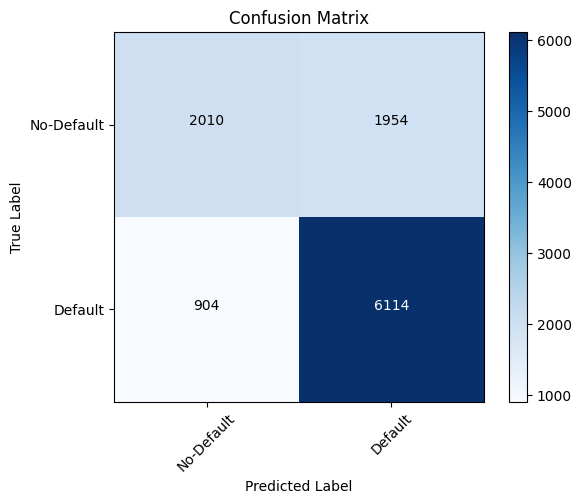

Confusion matrix:
 [[3241  723]
 [ 531 6487]]
Precision: 0.76
Recall: 0.87
Accuracy: 0.74
AUC: 0.69
For MLP : F1 Score 0.81

Performance of Random Forest:
Sensitivity: 0.926902251353662
Specificity: 0.8173562058526741
Confusion matrix:
 [[3240  724]
 [ 513 6505]]
Precision: 0.90
Recall: 0.93
Accuracy: 0.89
AUC: 0.87
For RF : F1 Score 0.91

Performance of Meta Model (LogisticRegressionClassifier):
Sensitivity: 0.9475634083784554
Specificity: 0.8433400605449042
Confusion matrix:
 [[3343  621]
 [ 368 6650]]
Precision: 0.91
Recall: 0.95
Accuracy: 0.91
AUC: 0.97
For LR : F1 Score 0.93


In [99]:
# Evaluate the performance of each base model
print("Performance of Base Model 1 (KNN):")
y_pred1 = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Confusion matrix:\n", cm)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)
auc1 = roc_auc_score(y_test, y_pred1)
print("Confusion matrix:\n", cm)
print("Precision: {:.2f}".format(precision1))
print("Recall: {:.2f}".format(recall1))
print("Accuracy: {:.2f}".format(accuracy1))
print("AUC: {:.2f}".format(auc1))
print("For KNN : F1 Score {}".format(round(f1_score(y_test,y_pred1),2)))

print("\nPerformance of Base Model 2 (Gradient Boosting):")
y_pred2 = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Confusion matrix:\n", cm)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
print("Confusion matrix:\n", cm)
print("Precision: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("Accuracy: {:.2f}".format(accuracy2))
print("AUC: {:.2f}".format(auc2))
print("For GB : F1 Score {}".format(round(f1_score(y_test,y_pred3),2)))

print("\nPerformance of Base Model MLP:")
y_pred3 = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm3.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Confusion matrix:\n", cm)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No-Default', 'Default'], rotation=45)
plt.yticks(tick_marks, ['No-Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)
print("Confusion matrix:\n", cm3)
print("Precision: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))
print("Accuracy: {:.2f}".format(accuracy3))
print("AUC: {:.2f}".format(auc3))
print("For MLP : F1 Score {}".format(round(f1_score(y_test,y_pred3),2)))

print("\nPerformance of Random Forest:")
y_pred4 = model4.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred4)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm3.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
precision3 = precision_score(y_test, y_pred4)
recall3 = recall_score(y_test, y_pred4)
accuracy3 = accuracy_score(y_test, y_pred4)
auc3 = roc_auc_score(y_test, y_pred4)
print("Confusion matrix:\n", cm3)
print("Precision: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))
print("Accuracy: {:.2f}".format(accuracy3))
print("AUC: {:.2f}".format(auc3))
print("For RF : F1 Score {}".format(round(f1_score(y_test,y_pred4),2)))

print("\nPerformance of Meta Model (LogisticRegressionClassifier):")
y_pred = meta_model.predict(X_meta_test)
cm2 = confusion_matrix(y_test, y_pred)
# Calculate the sensitivity and specificity from the confusion matrix
tn, fp, fn, tp = cm2.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Get the different scores
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_pred_ensemble)
print("Confusion matrix:\n", cm2)
print("Precision: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("Accuracy: {:.2f}".format(accuracy2))
print("AUC: {:.2f}".format(auc2))
print("For LR : F1 Score {}".format(round(f1_score(y_test,y_pred),2)))





The stacked ensemble model with Logistic Regression as metamodel accomplished an accuracy of 0.91 and Precision of 0.91 and recall of 0.94.


LSTM Model Performance

LSTM models' training histories was plotted to assess the performance of the LSTM model.


In [106]:
# Define the meta model
meta_model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Define the meta model
meta_model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(1, activation='sigmoid')
])
meta_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
 history=meta_model.fit(X_meta, y_train,
           batch_size=128,
           epochs=100,
           validation_data=[X_meta_test, y_test])
 print(history.history['loss'])
 print(history.history['accuracy'])

Epoch 1/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.8497 - val_loss: 0.6702 - val_accuracy: 0.7968
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8517 - val_loss: 0.6732 - val_accuracy: 0.7968
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8507 - val_loss: 0.6686 - val_accuracy: 0.7968
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8513 - val_loss: 0.6679 - val_accuracy: 0.7968
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8511 - val_loss: 0.6727 - val_accuracy: 0.7968
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8519 - val_loss: 0.6718 - val_accuracy: 0.7968
Epoch 7/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8507 - val_loss: 0.6683 - val_accuracy: 0.7968

In [114]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [115]:
# Define the meta model
meta_model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Define the meta model
meta_model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(1, activation='sigmoid')
])
meta_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
 history=meta_model.fit(X_meta, y_train,
           batch_size=128,
           epochs=30,
           validation_data=[X_meta_test, y_test])
 print(history.history['loss'])
 print(history.history['accuracy'])

Epoch 1/30
129/129 [==============================] - 1s 3ms/step - loss: 0.5780 - accuracy: 0.6655 - val_loss: 0.5565 - val_accuracy: 0.7937
Epoch 2/30
129/129 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8080 - val_loss: 0.5459 - val_accuracy: 0.7933
Epoch 3/30
129/129 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.8425 - val_loss: 0.5651 - val_accuracy: 0.7911
Epoch 4/30
129/129 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8482 - val_loss: 0.5802 - val_accuracy: 0.7945
Epoch 5/30
129/129 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8496 - val_loss: 0.6043 - val_accuracy: 0.7958
Epoch 6/30
129/129 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8496 - val_loss: 0.6199 - val_accuracy: 0.7968
Epoch 7/30
129/129 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8507 - val_loss: 0.6264 - val_accuracy: 0.7968
Epoch 

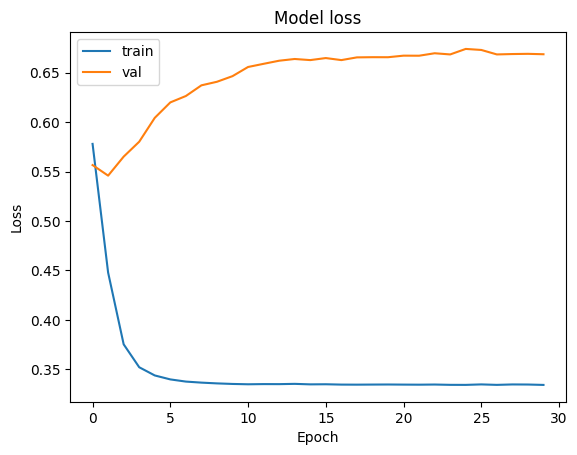

In [117]:
# Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The LSTM ensemble model displayed instability for the first five training epochs before attempting to stabilize itself. The curves then behaved predictably for the next 30 epochs.

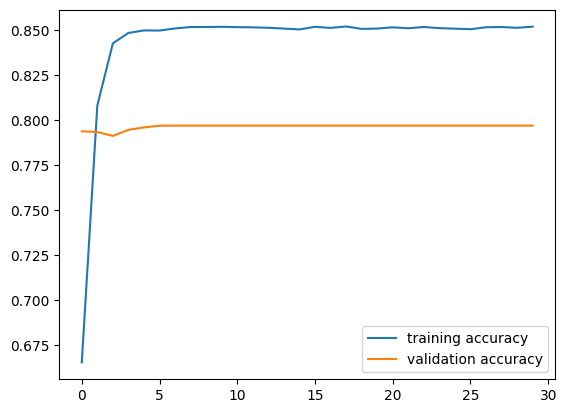

In [118]:
# Accuracy Curve
plt.plot(meta_model.history.history["accuracy"], label="training accuracy")
plt.plot(meta_model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

The validation accuracy and training accuracy increases steadily and becomes stable after a particular epoch.

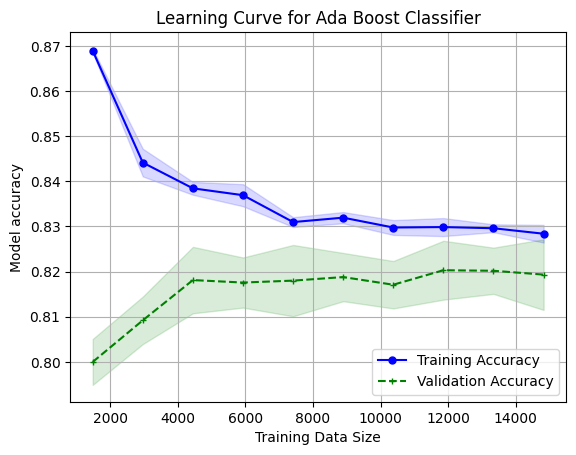

In [119]:
# Learning Curve For  AdaBoost Classifier with hyperparameters

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=AdaBoostClassifier(learning_rate= 1.1, n_estimators= 100), X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#estimator=RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for Ada Boost Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The proposed LSTM neural network stacking ensemble with feature engineering technique SMOTE ENN proven exceptional performance when assessed to these state-of-the-art techniques, demonstrating the robustness of the proposed method.